In [6]:
import numpy as np
from spec_id import Scale_model, Cluster, Cluster_model,Gauss_dist,Divide_cont,Cluster_fit,Error
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
metal=np.arange(0.002,0.031,0.001)
# age=np.arange(7.0,14.1,.1)
age = [np.arange(5,13.1,.1),np.arange(4,13.1,.1),np.arange(9,14.1,.1),
       np.arange(9,14.1,.1),np.arange(9,14.1,.1),np.arange(9,14.1,.1)]
tau=[0]
# tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
#      9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

M,A=np.meshgrid(metal,age)

cluster=[6528,6553,5927,6304,6388,6441]

(29, 41)
(41,)
[[14 11]]
Best fit model is 11.4 Gyr and 0.013 Z
(29, 41)
(41,)
[[12 27]]
Best fit model is 11.2 Gyr and 0.029 Z


(29, 41)
(41,)
[[10 27]]
Best fit model is 11.0 Gyr and 0.029 Z


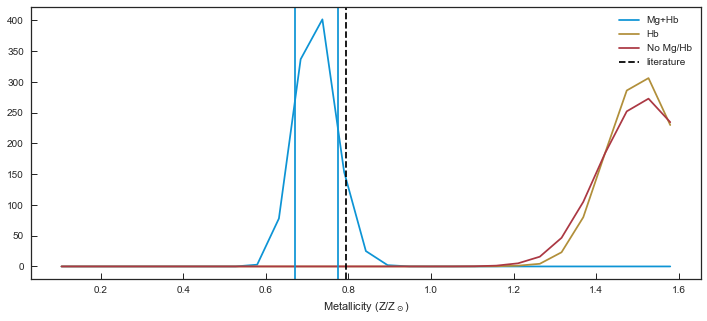

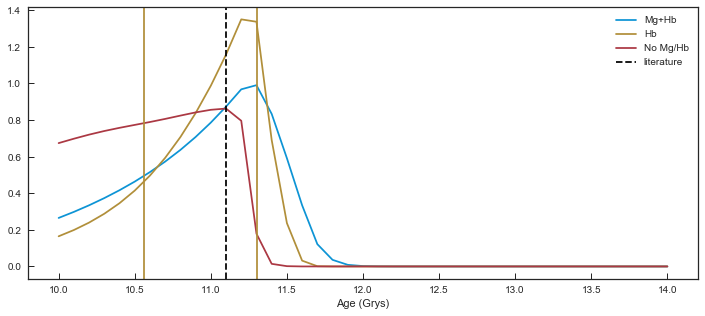

(29, 61)
(61,)
[[25  9]]
Best fit model is 10.5 Gyr and 0.011 Z
(29, 61)
(61,)
[[27 28]]
Best fit model is 10.7 Gyr and 0.03 Z


(29, 61)
(61,)
[[17 28]]
Best fit model is 9.7 Gyr and 0.03 Z


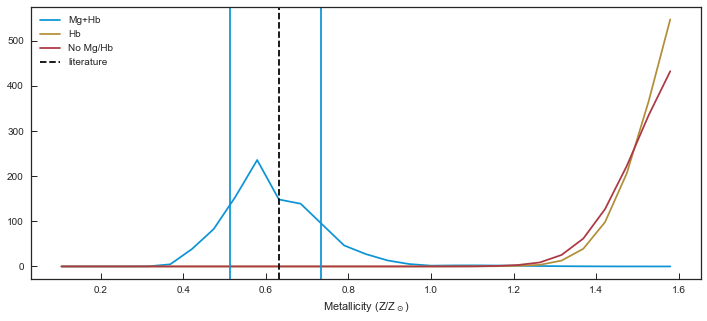

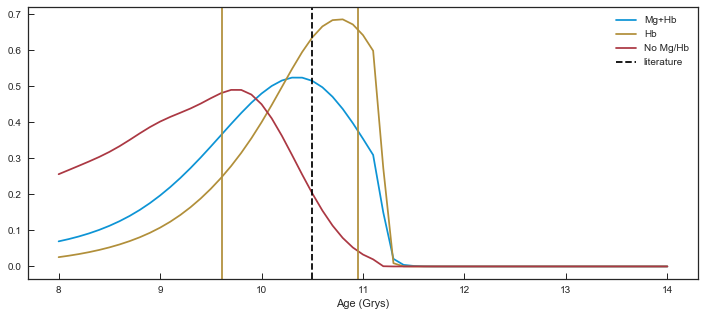

(29, 42)
(42,)
[[13  7]]
Best fit model is 11.2 Gyr and 0.009 Z
(29, 42)
(42,)
[[16 12]]
Best fit model is 11.5 Gyr and 0.014 Z


(29, 42)
(42,)
[[15  9]]
Best fit model is 11.4 Gyr and 0.011 Z


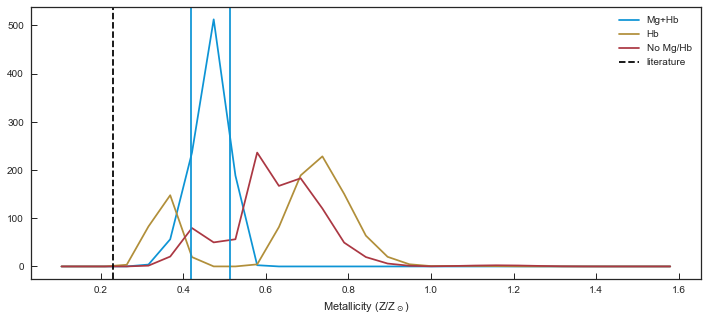

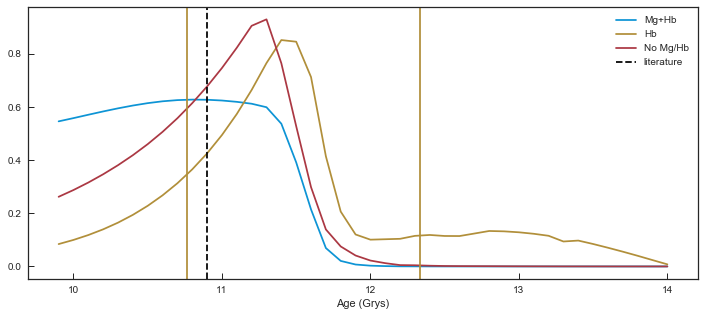

(29, 28)
(28,)
[[0 7]]
Best fit model is 11.3 Gyr and 0.009 Z
(29, 28)
(28,)
[[ 3 11]]
Best fit model is 11.6 Gyr and 0.013 Z


(29, 28)
(28,)
[[2 9]]
Best fit model is 11.5 Gyr and 0.011 Z


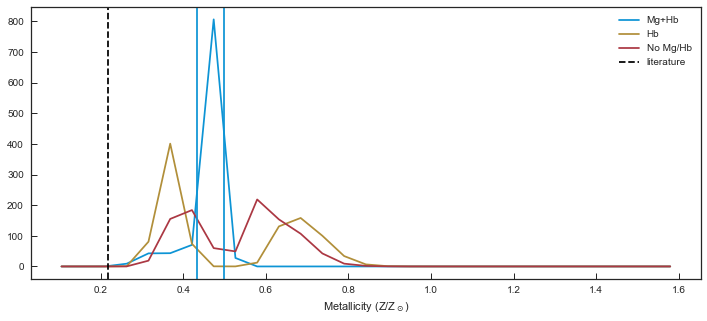

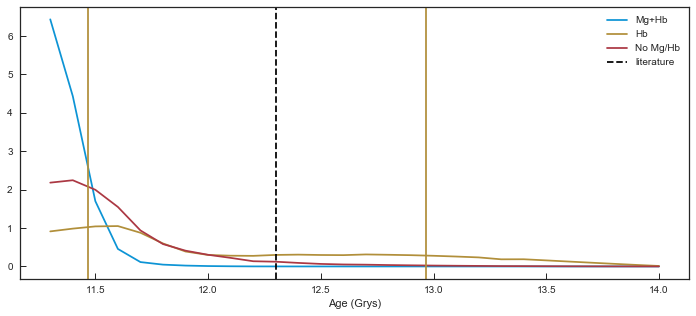

(29, 25)
(25,)
[[0 1]]
Best fit model is 11.6 Gyr and 0.003 Z
(29, 25)
(25,)
[[0 3]]
Best fit model is 11.6 Gyr and 0.005 Z


(29, 25)
(25,)
[[0 3]]
Best fit model is 11.6 Gyr and 0.005 Z


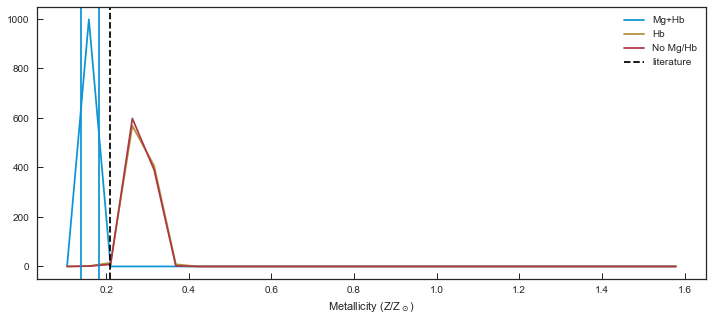

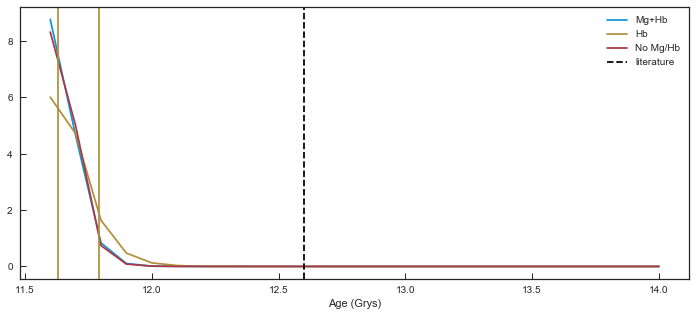

(29, 16)
(16,)
[[0 1]]
Best fit model is 12.5 Gyr and 0.003 Z
(29, 16)
(16,)
[[0 3]]
Best fit model is 12.5 Gyr and 0.005 Z
(29, 16)
(16,)
[[0 1]]
Best fit model is 12.5 Gyr and 0.003 Z


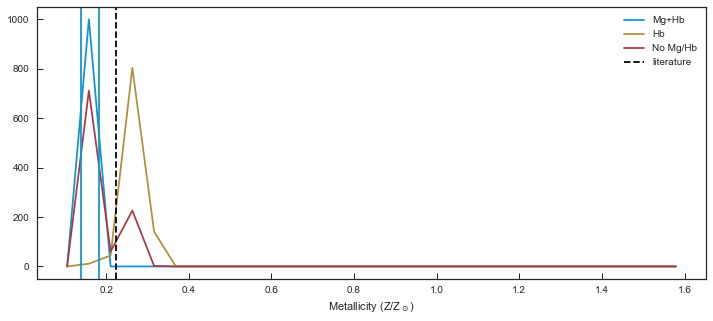

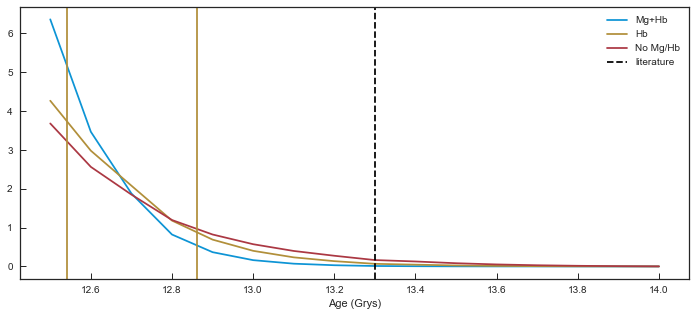

In [18]:
%matplotlib inline
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
age=[np.arange(10,14.1,.1),np.arange(8,14.1,.1),np.arange(9.9,14.1,.1),np.arange(11.3,14.1,.1),
     np.arange(11.6,14.1,.1),np.arange(12.5,14.1,.1)]

rshift=[1.1,1.2,1.35]
cluster=[6528, 6553,5927,6304,6388,6441]
mmeas = 10**np.array([-.1,-.2,-.64,-.66,-.68,-.65])
ameas = np.array([11.1,10.5,10.9,12.3,12.6,13.3])

for i in range(len(cluster)):
    mp = []
    ap = []
    for ii in range(len(rshift)):
        ngc=Cluster('../clusters/ngc%s_griz_err_%s.npy' % (cluster[i],rshift[ii]),rshift[ii])
        ngc.Analyze_fit('../chidat/ngc%s_err_va_%s_chidata.fits' % (cluster[i],rshift[ii]),metal,age[i],tau)
        mp.append(ngc.MP)
        ap.append(ngc.AP)
    
    merrl,merrh=Error(mp[0],metal)
    
    plt.figure(figsize=[12,5])
    plt.plot(metal/.019,mp[0],color='#0D94D5',label='Mg+Hb')
    plt.plot(metal/.019,mp[1],color='#B18F3A',label='Hb')
    plt.plot(metal/.019,mp[2],color='#AB3843',label='No Mg/Hb')
    plt.axvline(mmeas[i],linestyle='--',color='k',label='literature')
    plt.axvline(merrl/.019,color='#0D94D5')
    plt.axvline(merrh/.019,color='#0D94D5')
    plt.xlabel('Metallicity (Z/Z$_\odot$)')
    plt.legend()
    plt.show()
    plt.close()
    
    aerrl,aerrh=Error(ap[1],age[i])
    
    plt.figure(figsize=[12,5])
    plt.plot(age[i],ap[0],color='#0D94D5',label='Mg+Hb')
    plt.plot(age[i],ap[1],color='#B18F3A',label='Hb')
    plt.plot(age[i],ap[2],color='#AB3843',label='No Mg/Hb')
    plt.axvline(ameas[i],linestyle='--',color='k',label='literature')
    plt.axvline(aerrl,color='#B18F3A')
    plt.axvline(aerrh,color='#B18F3A')
    plt.xlabel('Age (Grys)')
    plt.legend()
    plt.show()
    plt.close()

In [22]:
%matplotlib inline
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
age=np.arange(.5,14.1,.1)

rshift=[1.1,1.2,1.35]
cluster=[6528, 6553,5927,6304,6388,6441]
# cluster=[6528, 6553]
mmeas = 10**np.array([-.1,-.2,-.64,-.66,-.68,-.65])
ameas = np.array([11.1,10.5,10.9,12.3,12.6,13.3])

for i in range(len(cluster)):
    mp = []
    ap = []
    for ii in range(len(rshift)):
        ngc=Cluster('../clusters/ngc%s_griz_err_%s.npy' % (cluster[i],rshift[ii]),rshift[ii])
        ngc.Analyze_fit('../chidat/ngc%s_err_al_fa_%s_chidata.fits' % (cluster[i],rshift[ii]),metal,age,tau)
        mp.append(ngc.MP)
        ap.append(ngc.AP)
    
    merrl,merrh=Error(mp[0],metal)
    
    plt.figure(figsize=[12,5])
    plt.plot(metal/.019,mp[0],color='#0D94D5',label='Mg+Hb')
    plt.plot(metal/.019,mp[1],color='#B18F3A',label='Hb')
    plt.plot(metal/.019,mp[2],color='#AB3843',label='No Mg/Hb')
    plt.axvline(mmeas[i],linestyle='--',color='k',label='literature')
    plt.axvline(merrl/.019,color='#0D94D5')
    plt.axvline(merrh/.019,color='#0D94D5')
    plt.title('ngc%s' % cluster[i])
    plt.ylabel('P(Z)')
    plt.xlabel('Metallicity (Z/Z$_\odot$)')
    plt.legend()
    # plt.show()
    plt.savefig('../plots/ngc%s_Z_fa.png' % cluster[i])
    plt.close()
    
    aerrl,aerrh=Error(ap[1],age)
    
    plt.figure(figsize=[12,5])
    plt.plot(age,ap[0],color='#0D94D5',label='Mg+Hb')
    plt.plot(age,ap[1],color='#B18F3A',label='Hb')
    plt.plot(age,ap[2],color='#AB3843',label='No Mg/Hb')
    plt.axvline(ameas[i],linestyle='--',color='k',label='literature')
    plt.axvline(aerrl,color='#B18F3A')
    plt.axvline(aerrh,color='#B18F3A')
    plt.title('ngc%s' % cluster[i])
    plt.ylabel('P(t)')
    plt.xlabel('Age (Grys)')
    plt.legend()
    # plt.show()
    plt.savefig('../plots/ngc%s_t_fa.png' % cluster[i])
    plt.close()

(29, 136)
(136,)
[[109  11]]
Best fit model is 11.4 Gyr and 0.013 Z
(29, 136)
(136,)
[[107  27]]
Best fit model is 11.2 Gyr and 0.029 Z
(29, 136)
(136,)
[[105  27]]
Best fit model is 11.0 Gyr and 0.029 Z


(29, 136)
(136,)
[[100   9]]
Best fit model is 10.5 Gyr and 0.011 Z
(29, 136)
(136,)
[[102  28]]
Best fit model is 10.7 Gyr and 0.03 Z
(29, 136)
(136,)
[[92 28]]
Best fit model is 9.7 Gyr and 0.03 Z


(29, 136)
(136,)
[[78  7]]
Best fit model is 8.3 Gyr and 0.009 Z
(29, 136)
(136,)
[[110  12]]
Best fit model is 11.5 Gyr and 0.014 Z
(29, 136)
(136,)
[[109   9]]
Best fit model is 11.4 Gyr and 0.011 Z


(29, 136)
(136,)
[[67  7]]
Best fit model is 7.2 Gyr and 0.009 Z
(29, 136)
(136,)
[[111  11]]
Best fit model is 11.6 Gyr and 0.013 Z
(29, 136)
(136,)
[[110   9]]
Best fit model is 11.5 Gyr and 0.011 Z


(29, 136)
(136,)
[[38  7]]
Best fit model is 4.3 Gyr and 0.009 Z
(29, 136)
(136,)
[[34 13]]
Best fit model is 3.9 Gyr and 0.015 Z
(29, 136)
(136,)
[[27 25]]
Best fit model is 3.2 Gyr and 0.027 Z


(29, 136)
(136,)
[[46  7]]
Best fit model is 5.1 Gyr and 0.009 Z
(29, 136)
(136,)
[[102  13]]
Best fit model is 10.7 Gyr and 0.015 Z
(29, 136)
(136,)
[[28 27]]
Best fit model is 3.3 Gyr and 0.029 Z


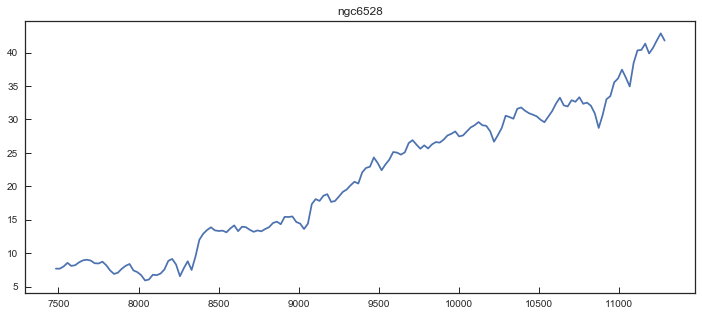

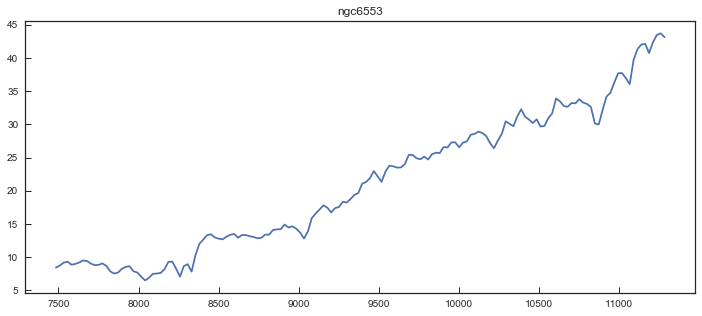

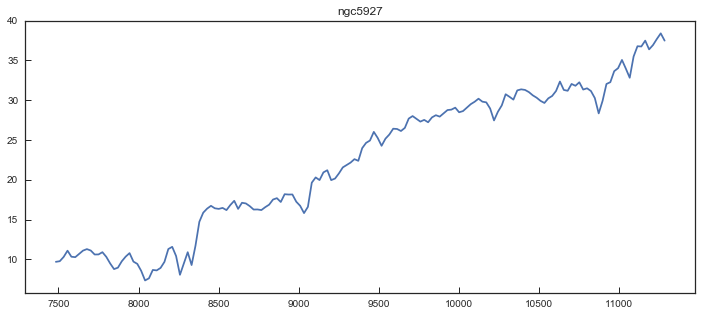

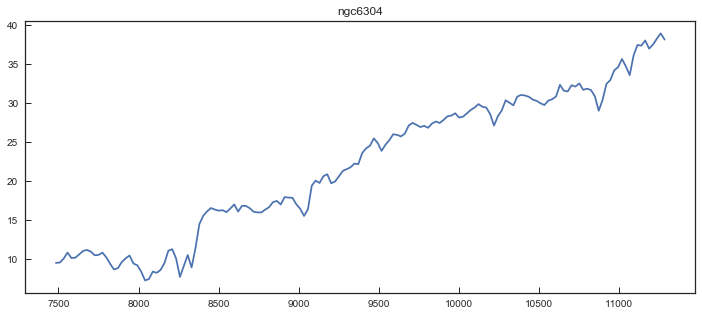

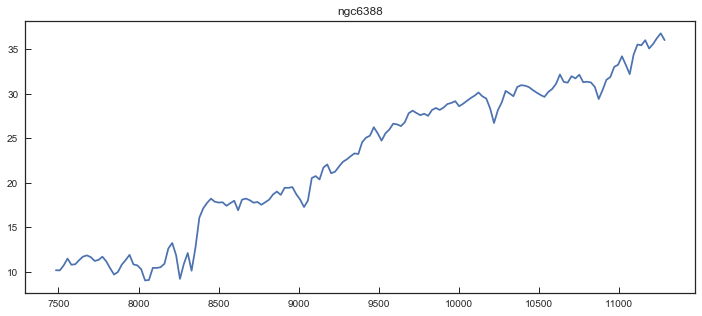

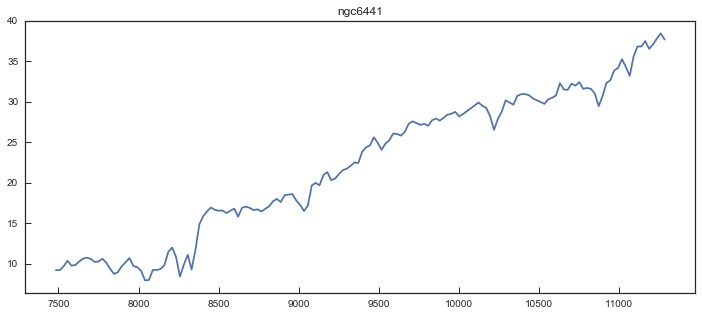

In [25]:
for i in range(len(cluster)):
    ngc=Cluster('../clusters/ngc%s_griz_err_1.1.npy' % (cluster[i]),1.1)
    plt.figure(figsize=[12,5])
    plt.plot(ngc.wv[ngc.wv < 11300],ngc.fl[ngc.wv < 11300])
    plt.title('ngc%s' % cluster[i])
    plt.show()
    plt.close()